### Importing necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.metrics import accuracy_score, confusion_matrix #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

import warnings
warnings.filterwarnings("ignore")

### Loading data

In [2]:
data = pd.read_csv('dataset/winequality.csv') #  Loading the dataset fron its path

### Analysing the data

In [3]:
print(f'Shape of the dataset : {data.shape}')
# Identifying the shape of the data which gives information related to number of records present in the dataset. 

Shape of the dataset : (1599, 12)


In [4]:
data.head(2) # shows the first 2 samples of data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [5]:
data.isnull().sum() # checking for any null values present in the dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**It is observed that no null values are present in the dataset**

In [6]:
data.info() # Checking the basic info of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**OBSERVATIONS**
   - **The dataset have 1599 records**
   - **No columns in the dataset has null values in it.**
   - **Dataset consists of 11 dependent variable/coumns/features and 1 independent variable/target variable.**
   - **All columns are of dtype "float64" except the target variable which is of type "int64".**

### Lets check the target variable

In [7]:
target = "quality" 
data[target].unique() # Identifying the unique values in the target variable

array([5, 6, 7, 4, 8, 3])

**OBSERVATION**
  - **There are 6 unique values in the target variable which are 3,4,5,6,7,8.**
  - **So, we can perform teh classification task on the dataset.**

In [8]:
data[target].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**OBSERVATION**
  - **As we can see the dataset is not eually distribute. We have some class with more data and with less data.**
  - **So, We need to be cautious when preparing dataset for train and test. Because the model may overfit on class which has more records compared to call with less records.**
  - **Class '5' has more recors and class '3' has less records.**

### Lets plot how the target variable is dependent on some columns

In [9]:
features = list(data.columns)
features  = [i for i in features if i!=target]

In [10]:
features # List of features in the dataset except the target variable.

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

Text(0.5, 1.0, 'sulphates')

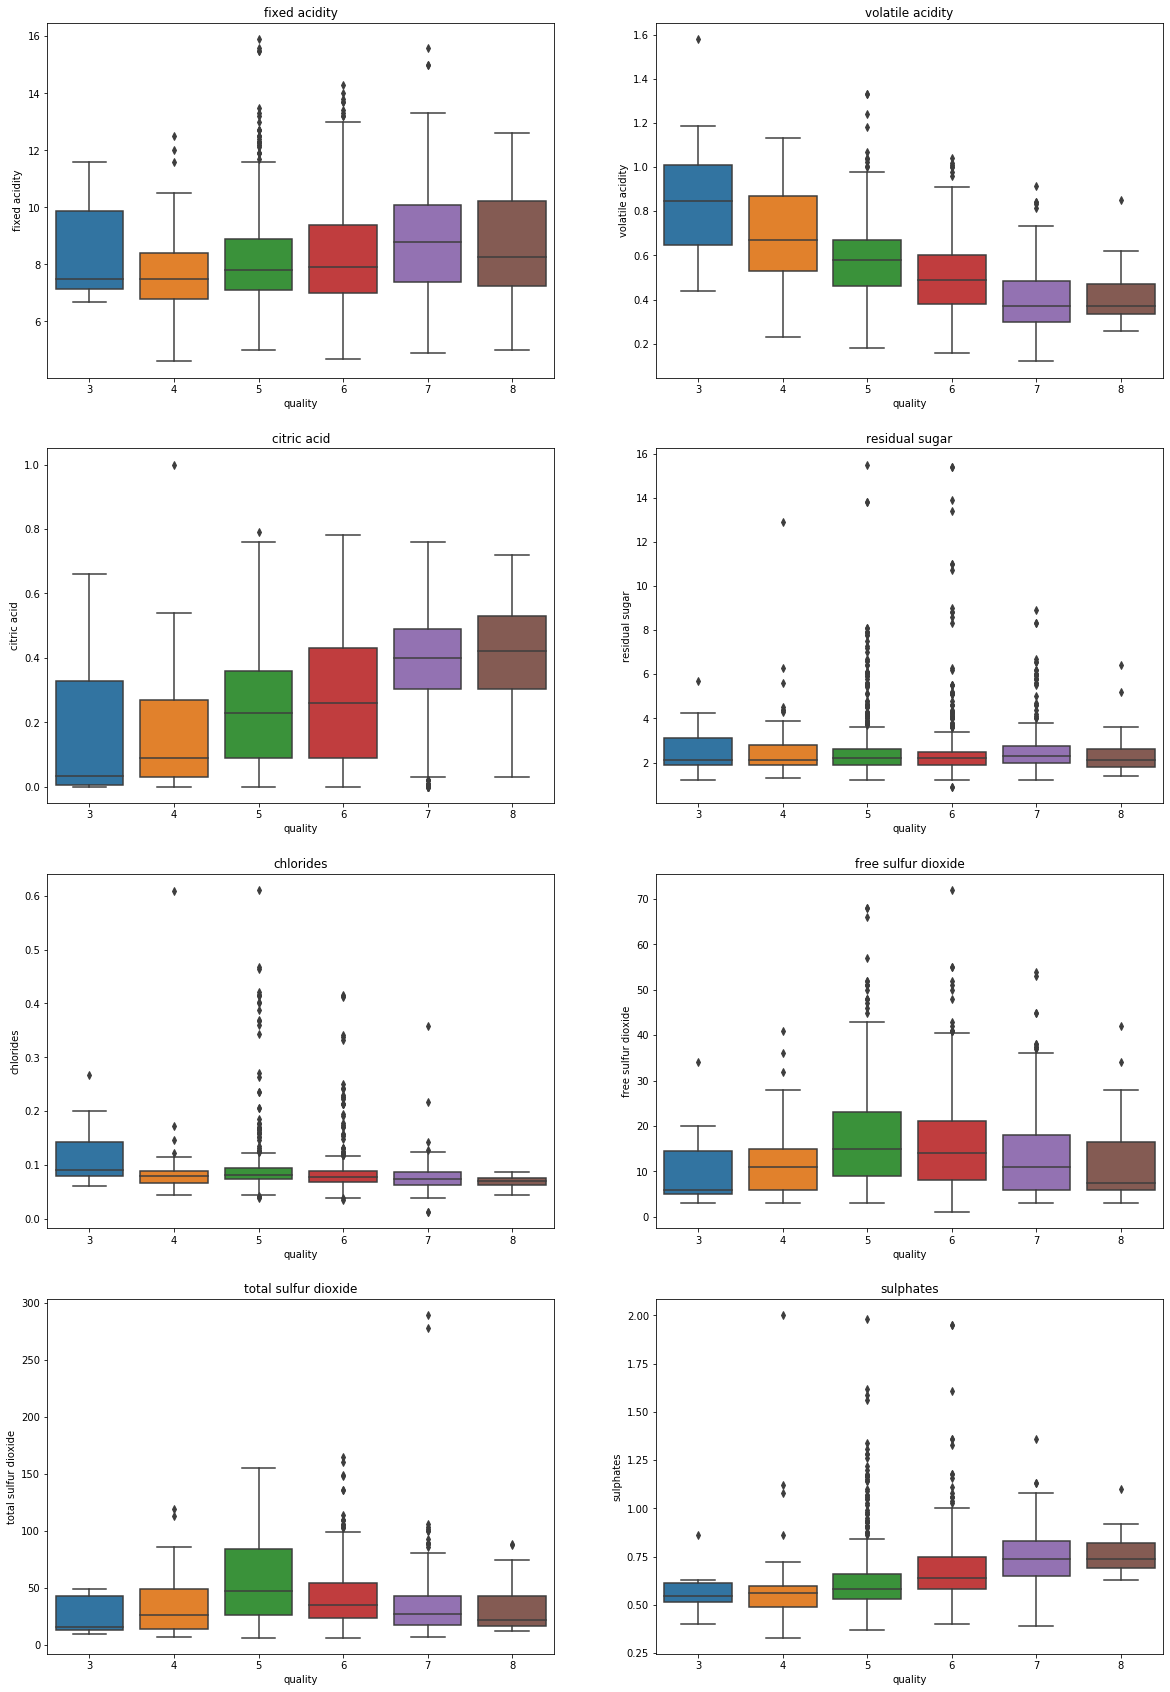

In [11]:
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
sns.boxplot(ax=axes[0, 0], x=target,y='fixed acidity',data=data)
axes[0, 0].set_title('fixed acidity')
sns.boxplot(ax=axes[0, 1], x=target,y='volatile acidity',data=data)
axes[0, 1].set_title('volatile acidity')
sns.boxplot(ax=axes[1, 0], x=target,y='citric acid',data=data)
axes[1, 0].set_title('citric acid')
sns.boxplot(ax=axes[1, 1], x=target,y='residual sugar',data=data)
axes[1, 1].set_title('residual sugar')
sns.boxplot(ax=axes[2, 0], x=target,y='chlorides',data=data)
axes[2, 0].set_title('chlorides')
sns.boxplot(ax=axes[2, 1], x=target,y='free sulfur dioxide',data=data)
axes[2, 1].set_title('free sulfur dioxide')
sns.boxplot(ax=axes[3, 0], x=target,y='total sulfur dioxide',data=data)
axes[3, 0].set_title('total sulfur dioxide')
sns.boxplot(ax=axes[3, 1], x=target,y='sulphates',data=data)
axes[3, 1].set_title('sulphates')

**Different plots above represents the distribution of features over the target variable. Some of the observations made from the above plots are mentioned below.**
   - As we can see that all the class has almost same distribution of fixed acidity
   - So, fixed acidity does not give any specification to classify the quality.
   - We can see that as teh quality increases the volitile acidity is distribution is decreasing.
   - Similarly we can see the uptrend in the citric acid values as teh quality of the wine increasing.
   - We can draw some more required information from the above plots which can help in fine-tuning the model to improve the performance.
   - The dots in the plots represents the outliers present in the dataset. This outliers may effect the model to decrease the performance.

### Lets see the correlation between teh features in the dataset

In [12]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**OBSERVATIONS**
   - Above table provides the information related to the correlation between the features.
   - Negetive value indicates that thte features are negetively correlated to each other. if one value increases then other will decrease.
   - From the correlation table we can see that the target variable is highly correlated on the 'ALCOHOL' feature compared to other features and most negetively correlated to the 'VOLATILE ACIDITY' feature.

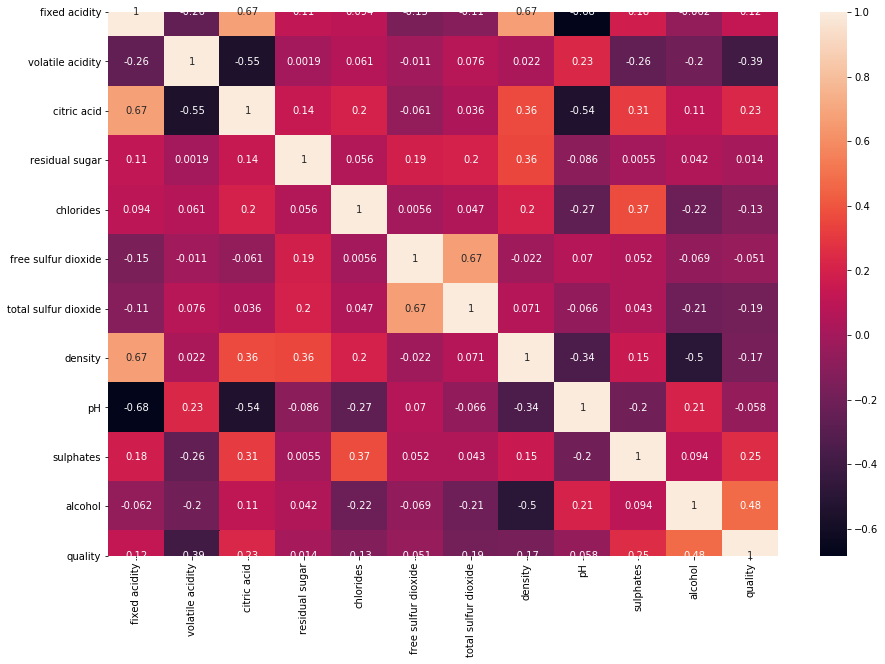

In [13]:
plt.figure(figsize=(15,10)) 
sns.heatmap(data.corr(),annot=True) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

**This represents the heatmap chart of correlation betweent he features.**

**We can observe that all the diagonal elements in the correlation chart is '1' because same features are equally correlated to each other.**

### Lets change the target values into categorical

In [14]:
data[target].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
le=LabelEncoder()
data[target] = le.fit_transform(data[target])

In [16]:
data[target].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

**We can observe from the above that before performing label encoding the values of the target varible is 3, 4, 5, 6, 7, 8 but after performing the values are changed to 0, 1, 2, 3, 4, 5.**

**Label encoding technique helps to convert the target labels into interger values using the fit-transform mtethod and then we can transfor this integer values into labels using the transform method of label encoder.**

#### Lets split the data into train and test using stratified

In [17]:
# Splitting the dataset into train and test set with 80% in train and 20% in test to validate the model
train, test = train_test_split(data, test_size = 0.2, shuffle=True, random_state=42, stratify=data[target])

print(f'Shape of train dataset : {train.shape}') # getting train data shape
print(f'Shape of train dataset : {test.shape}') # getting test data shape

Shape of train dataset : (1279, 12)
Shape of train dataset : (320, 12)


In [18]:
train[target].value_counts()

2    545
3    510
4    159
1     42
5     15
0      8
Name: quality, dtype: int64

In [19]:
test[target].value_counts()

2    136
3    128
4     40
1     11
5      3
0      2
Name: quality, dtype: int64

**We used stratify argument in train_test_split.** 

**This helps to split the data using the target variable in the each proportion of each class in train and test.**

**We can see that in both train and test we can see all the 5 class in the data in same proportion.**

**If we don't perform the stratify then there is a chance that we may have only 4 classes in test and 5 in train (or) vice-versa.**

**To reduce this behaviour and to increase the performance of the model it is better to split the data using stratify on the imbalanced dataset.**

In [20]:
train_X = train[features]# taking the training data features
train_y=train[target]# output of our training data
test_X= test[features] # taking test data features
test_y =test[target]   #output value of test data

### Training the model using the Support vector Machine

In [21]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the SVM is : {accuracy*100}%')#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is : 58.4375%


### Training the model using the Decision Tree

In [22]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Decision Tree is : {accuracy*100}%')

The accuracy of the Decision Tree is : 62.18749999999999%


### Lets perform standard scalar and check the results

In [23]:
sc = StandardScaler()
data[features] = sc.fit_transform(data[features])

In [24]:
# Splitting the dataset into train and test set with 80% in train and 20% in test to validate the model
train, test = train_test_split(data, test_size = 0.2, shuffle=True, random_state=42, stratify=data[target])

print(f'Shape of train dataset : {train.shape}') # getting train data shape
print(f'Shape of train dataset : {test.shape}') # getting test data shape

Shape of train dataset : (1279, 12)
Shape of train dataset : (320, 12)


In [25]:
train_X = train[features]# taking the training data features
train_y=train[target]# output of our training data
test_X= test[features] # taking test data features
test_y =test[target]   #output value of test data

### Training the model using the Support vector Machine using sandard scaler data

In [26]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the SVM is : {accuracy*100}%')#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is : 62.81250000000001%


### Training the model using the Decision Tree using standard scalar data

In [27]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Decision Tree is : {accuracy*100}%')

The accuracy of the Decision Tree is : 60.3125%


**OBSERVATIONS**
  - The dataset consisits of ~1600 records with 6 classes
  - The dataset is not balanced. We have more records for some classes and less records for other classes
  - We observed that there is not much correlation between the features and between the target variable and features
  - As the dataset is imbalanced we used stratified techniques while splitting the dataset into train and test.
  - Used the SVC(Support Vector Machine) and Decision Tree to train the model.
  - We got 58.44% and 60.31% respectively for these models.
  - Then we used the standard scaler technique to scale teh data before training.
  - Using the scaled dataset the accuracy of the SVC model is increased to 62.8% but ther is no improvement in Decision Tree